# Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn import preprocessing
from itertools import cycle
from sklearn.decomposition import PCA

# Import dataset

In [2]:
df = pd.read_excel('../Data-gathering/Json/Final_Dataset.xlsx')
df = df.drop(['Index',
           'Date',
           'index',
           'Author name',
           'University',
           'country',
           'Google Scholar link of the university',
           'Google Scholar link of the author',
           'Qs uni world ranking',
           'Qs uni country ranking',
           'Date of the first publication (year)',
           'Date of the last publication (year)',
            ], axis=1)
cols = df.columns
main_df = df

# Minmax scaler

In [3]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(main_df)
min_maxed_df = pd.DataFrame(scaled, columns=[cols])

# Normalization

In [4]:
df_normalized = preprocessing.normalize(min_maxed_df)
dfcopy = df_normalized
df = pd.DataFrame(df_normalized, columns=[cols])

# Initialize and train model

In [5]:
dataset_limit = slice(4000)
af = AffinityPropagation(verbose=True)
clustering = af.fit(dfcopy[dataset_limit])

Converged after 65 iterations.


In [6]:
cluster_centers_indices = clustering.cluster_centers_
n_clusters_ = len(cluster_centers_indices)
labels = clustering.labels_
print(n_clusters_)

106


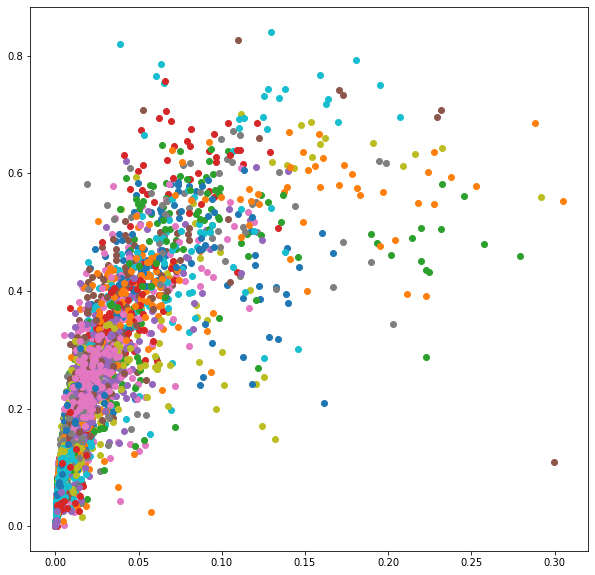

In [9]:
dfcopy = dfcopy[dataset_limit]
fig, ax = plt.subplots(figsize=(10, 10))

for k in range(n_clusters_):
    cluster = labels == k
    plt.scatter(dfcopy[cluster, 0] , dfcopy[cluster, 1])
plt.show()